In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.604422,-0.248433,1.099081,0.425096,0.591905,1
1,0.342134,2.725267,0.135488,0.831694,1.315513,1
2,2.370732,-0.556832,1.805768,-2.288724,0.713237,0
3,0.349580,-0.114656,1.863243,1.958041,1.489157,0
4,0.093711,-2.047429,0.886239,1.959125,1.987168,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
# function for features sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [9]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [10]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\ritik\AppData\Local\Temp\ipykernel_15964\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\ritik\AppData\Local\Temp\ipykernel_15964\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\ritik\AppData\Local\Temp\ipykernel_15964\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')


In [14]:
df3

,col2,col5,target
87,0.174763,1.298183,1
57,-0.372755,0.564330,1
71,0.407384,-0.390062,0
80,-0.635884,1.595510,0
59,1.248851,0.913797,1
89,0.167945,0.229758,0
56,-1.249355,0.255222,1
52,-2.958340,2.364115,0
29,3.447043,1.675092,1
29,3.447043,1.675092,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.4, 0.9666666666666667, 'x[1] <= -2.333\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.3, 0.9, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.35, 0.9333333333333333, 'True  '),
 Text(0.5, 0.9, 'x[0] <= 2.263\ngini = 0.49\nsamples = 42\nvalue = [24, 18]'),
 Text(0.45, 0.9333333333333333, '  False'),
 Text(0.3, 0.8333333333333334, 'x[0] <= -0.954\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.2, 0.7666666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4, 0.7666666666666667, 'x[0] <= -0.449\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.7, 'x[1] <= 0.515\ngini = 0.444\nsamples = 27\nvalue = [18, 9]'),
 Text(0.4, 0.6333333333333333, 'x[1] <= -1.947\ngini = 0.403\nsamples = 25\nvalue = [18.0, 7.0]'),
 Text(0.3, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.5666666666666667, 'x[1] <= -1.118\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Tex

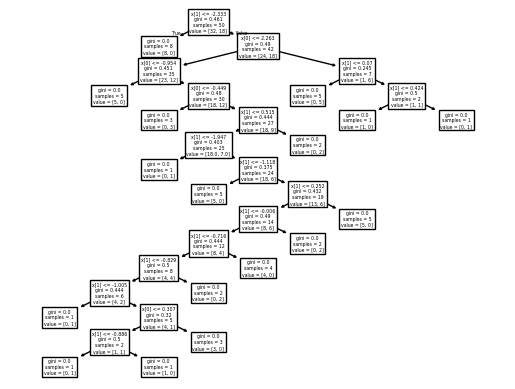

In [18]:
plot_tree(clf1)

[Text(0.6071428571428571, 0.9375, 'x[1] <= 0.482\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.42857142857142855, 0.8125, 'x[1] <= -0.013\ngini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(0.5178571428571428, 0.875, 'True  '),
 Text(0.2857142857142857, 0.6875, 'x[1] <= -1.218\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.21428571428571427, 0.5625, 'x[1] <= -1.455\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.14285714285714285, 0.4375, 'x[0] <= -1.83\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.07142857142857142, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.21428571428571427, 0.3125, 'x[0] <= -0.334\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.14285714285714285, 0.1875, 'x[1] <= -1.845\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07142857142857142, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21428571428571427, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.1875, 

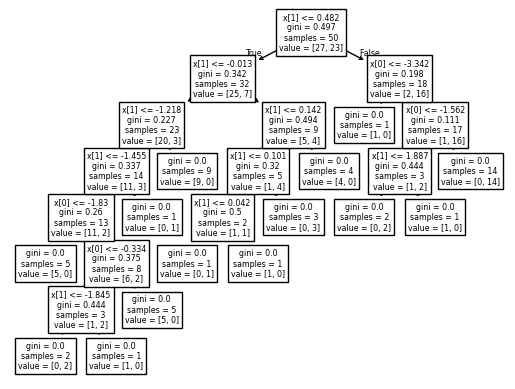

In [19]:
plot_tree(clf2)

[Text(0.6, 0.9375, 'x[0] <= 0.847\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.4, 0.8125, 'x[1] <= 1.394\ngini = 0.327\nsamples = 34\nvalue = [27, 7]'),
 Text(0.5, 0.875, 'True  '),
 Text(0.3, 0.6875, 'x[1] <= 0.253\ngini = 0.434\nsamples = 22\nvalue = [15.0, 7.0]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.4, 0.5625, 'x[1] <= 0.783\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.4375, 'x[0] <= -0.82\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.1, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.3125, 'x[1] <= 0.416\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.4375, 'x[0] <= -0.435\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.5, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.3125, 'x[1] <= 1.026\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),

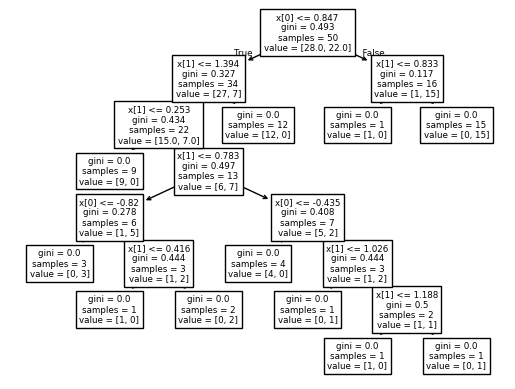

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\ritik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [24]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
66,2.213448,-1.890466,1.764453,-0.867782,1.753962,0
43,0.789750,-1.354546,0.930527,0.488253,1.007638,0
23,0.366544,-0.272684,0.735102,-1.009736,0.578167,0
49,3.060282,-2.188820,0.177427,-0.095817,0.578585,1
66,2.213448,-1.890466,1.764453,-0.867782,1.753962,0
47,-2.119101,4.918027,-2.574351,-1.741002,1.386034,1
48,2.019768,0.881801,0.440046,1.059071,1.430187,1
63,0.997730,-0.258113,1.592386,-0.586627,1.197199,0
91,0.960587,-0.152931,1.730914,-1.503449,1.697785,0
91,0.960587,-0.152931,1.730914,-1.503449,1.697785,0
